# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking at prospective properties to buy to enter the market.

The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

We are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [639]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [640]:
# Import all required packages
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import MinMaxScaler

# To build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Reading and Understanding the Data

In [641]:
# Import and read dataset
df_housing = pd.read_csv('train.csv')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [642]:
# Dimensions of the dataframe
df_housing.shape

(1460, 81)

In [643]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [644]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [645]:
# Make sure there are no duplicate rows in the dataset
sum(df_housing.duplicated(subset = 'Id')) == 0

True

There are no duplicate rows in the dataset.

### Missing Data

In [646]:
# Check for NaN values in dataset
print(df_housing.isnull().values.any())
print(df_housing.isnull().values.sum())

True
6965


There are quite a few NaN values in the dataset.

In [647]:
# Check for NA values columnwise
missing_values = (df_housing.isnull().sum()).sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [648]:
# List of columns with missing values
missing_cols = missing_values[missing_values>0]
print(missing_cols)
print("Total number of columns with missing values are :", missing_cols.count())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Total number of columns with missing values are : 19


### Missing Data Imputation

Let's impute columns with missing data using the information given in data_description.txt

In [649]:
# Imputing categorical variables

df_housing['PoolQC'].fillna('No Pool', inplace=True)
df_housing['MiscFeature'].fillna('None', inplace=True)
df_housing['Alley'].fillna('No alley access', inplace=True)
df_housing['Fence'].fillna('No Fence', inplace=True)
df_housing['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_housing['GarageCond'].fillna('No Garage', inplace=True)
df_housing['GarageType'].fillna('No Garage', inplace=True)
df_housing['GarageFinish'].fillna('No Garage', inplace=True)
df_housing['GarageQual'].fillna('No Garage', inplace=True)
df_housing['BsmtExposure'].fillna('No Basement', inplace=True)
df_housing['BsmtFinType2'].fillna('No Basement', inplace=True)
df_housing['BsmtFinType1'].fillna('No Basement', inplace=True)
df_housing['BsmtCond'].fillna('No Basement', inplace=True)
df_housing['BsmtQual'].fillna('No Basement', inplace=True)
df_housing['MasVnrType'].fillna('None', inplace=True)
df_housing['Electrical'].fillna('Mix', inplace=True)

# Imputing numerical variables

# There are good chances of a house having LotFrontage similar to other houses in the neighborhood,
# so let's impute LotFrontage based on this assumption
df_housing["LotFrontage"] = df_housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Since there are equal number of missing MasVnrType and MasVnrArea and we have filled MasVnrType with None,
# so let's impute MasVnrArea with '0' value
df_housing['MasVnrArea'].fillna(0, inplace=True)

In [650]:
# Since number of missing values in GarageYrBlt are same as GarageCond & GarageQual and 
# we have imputed them with 'No Garage', so it could be considered that these houses have no garages at all.
# Also the variables like  GarageCond and GarageQual will have a high correlation with GarageYrBlt and 
# can be used for house price preduction, so GarageYrBlt can be dropped.

df_housing.drop('GarageYrBlt', axis=1, inplace=True)

In [651]:
# Also let's drop Id column as it does not play any role in predicting house prices

df_housing.drop('Id', axis=1, inplace=True)

In [652]:
# Now let's again check for NA values columnwise
print(df_housing.isnull().sum().sort_values(ascending=False))
print("Number of missing values are :", df_housing.isnull().sum().sum())

SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
YearRemodAdd    0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
RoofStyle       0
YearBuilt       0
Heating         0
Utilities       0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
LotConfig       0
               ..
PoolArea        0
GarageCars      0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageArea      0
GarageFinish    0
CentralAir      0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

We have successfully imputed the missing data.

In [653]:
# Current dimensions of the dataframe
df_housing.shape

(1460, 79)

In [654]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

Looks like some of the variables types are not matching the description in data_description.txt

In [655]:
# Check the numeric variables
df_housing._get_numeric_data().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

As per data_description.txt, the following variables should be categorical in nature
- MSSubClass
- OverallQual
- OverallCond
- MoSold
- YrSold
- YearBuilt
- YearRemodAdd

In [656]:
# Convert numerical variables to categorical variables
df_housing['MSSubClass'] = df_housing['MSSubClass'].astype('object')
df_housing['OverallQual'] = df_housing['OverallQual'].astype('object')
df_housing['OverallCond'] = df_housing['OverallCond'].astype('object')
df_housing['MoSold'] = df_housing['MoSold'].astype('object')
df_housing['YrSold'] = df_housing['YrSold'].astype('object')
df_housing['YearBuilt'] = df_housing['YearBuilt'].astype('object')
df_housing['YearRemodAdd'] = df_housing['YearRemodAdd'].astype('object')

In [657]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      14

In [658]:
df_housing.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


### Feature Engineering

Now, let's create features which could be helpful in predicting housing prices

In [659]:
# Let's get the total number of bathrooms in a house
df_housing['TotalBaths'] = ((df_housing['BsmtFullBath']) + 
                            (df_housing['FullBath']) +
                            (df_housing['BsmtHalfBath']/2) +
                            (df_housing['HalfBath']/2))

In [660]:
# Let's get the total are of a house
df_housing['TotalSF'] = (df_housing['TotalBsmtSF'] + 
                         df_housing['1stFlrSF'] +
                         df_housing['2ndFlrSF'])

In [661]:
df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths,TotalSF
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,No Fence,None,0,2,2008,WD,Normal,208500,3.5,2566
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,No Fence,None,0,5,2007,WD,Normal,181500,2.5,2524
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,No Fence,None,0,9,2008,WD,Normal,223500,3.5,2706
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,No Fence,None,0,2,2006,WD,Abnorml,140000,2.0,2473
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,No Fence,None,0,12,2008,WD,Normal,250000,3.5,3343


### Univariate Analysis

Let's perform univariate analysis on target variable - SalePrice.

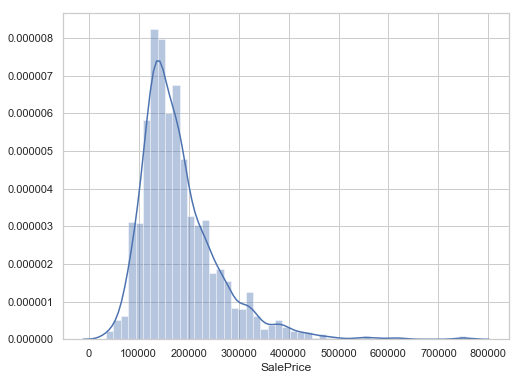

In [662]:
plt.figure(figsize = (8,6))
sns.distplot(df_housing['SalePrice'])

Observations:
- Majority of the houses are between 50000 and 250000 price range.
- Some houses have very high price range - as high as 800000.

### Data Correlation

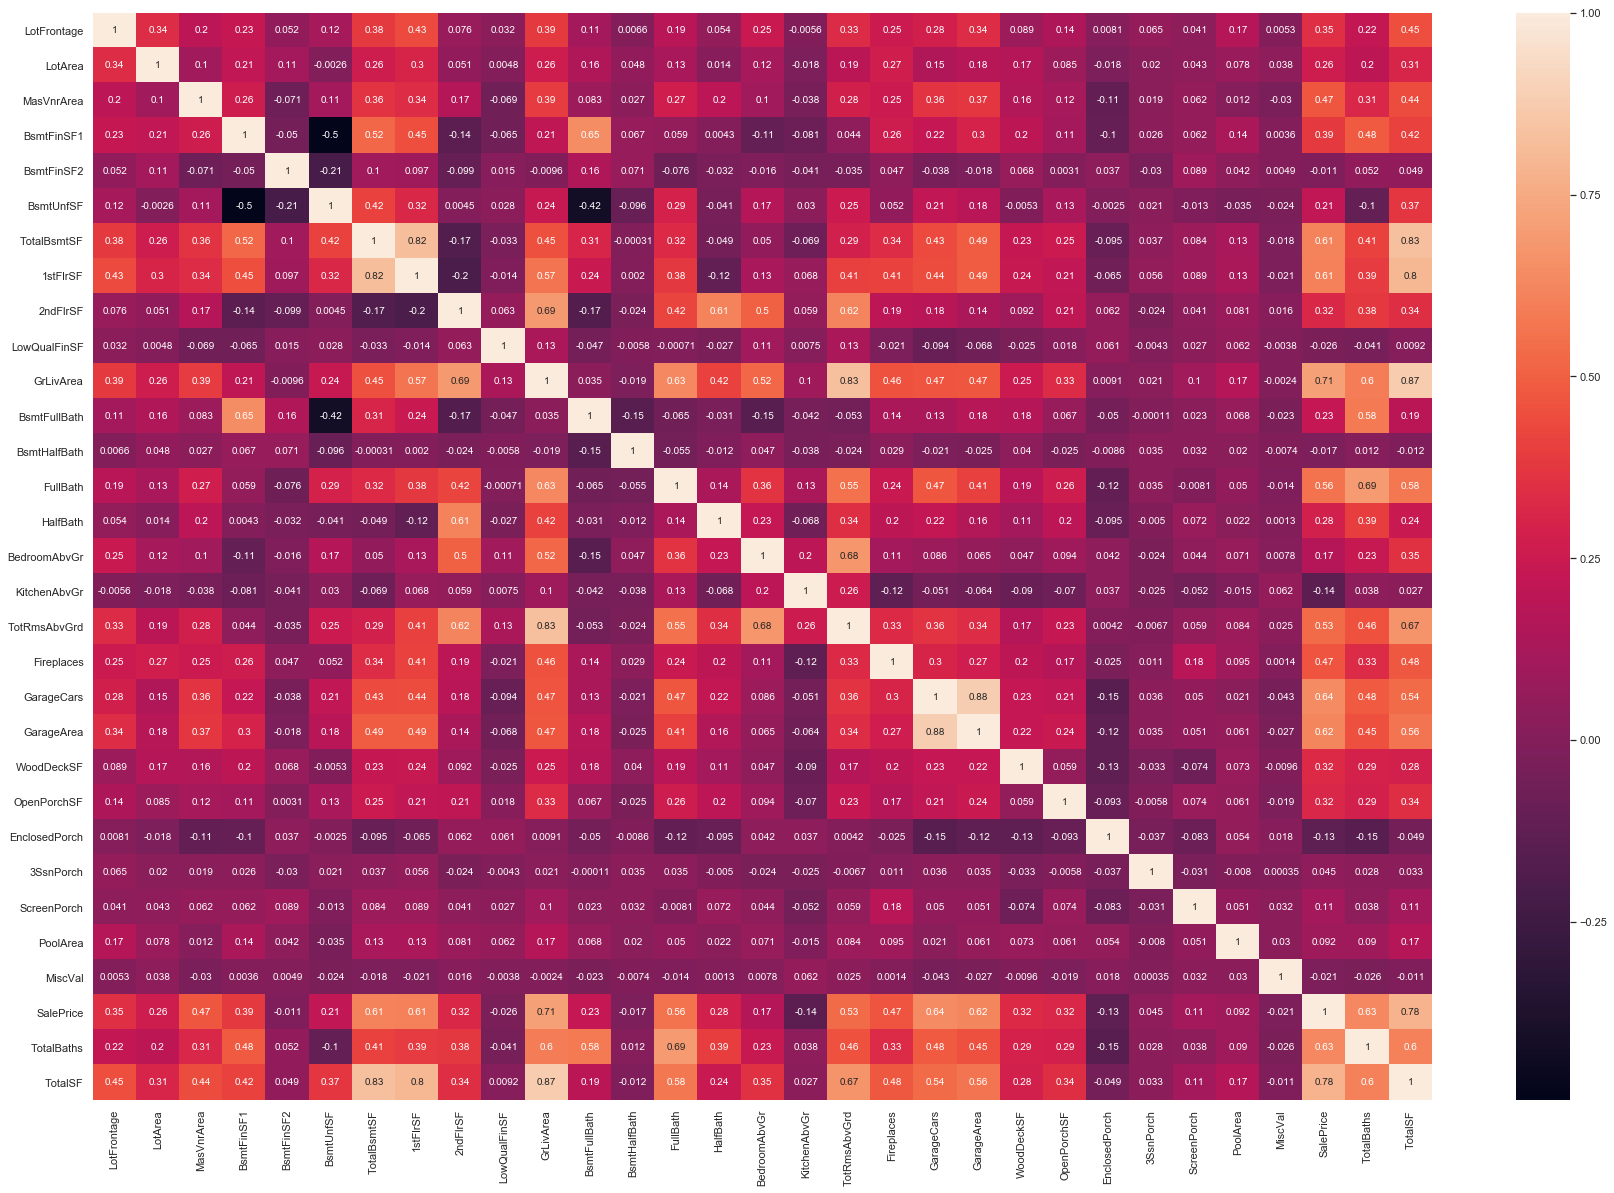

In [663]:
plt.figure(figsize = (30,20))
sns.heatmap(df_housing.corr(), annot=True)

Observations:
- SalePrice has a high correlation with:
    - TotalSF
    - TotalBaths
    - GarageCars
    - GarageArea
    - GrLivArea
    - 1stFlrSF
    - TotalBsmtSF
- High correlation between following variables which could be due to the multicollinearity:
    - GarageCars and GarageArea
    - 1stFlrSF and TotalBsmtSF
    - GrLivArea and TotRmsAbvGrd
    - GrLivArea and TotalSF
    - 1stFlrSF and TotalSF
    - TotalBsmtSF and TotalSF

Now, let's verify the correlation of SalePrice with above variables using scatter plots

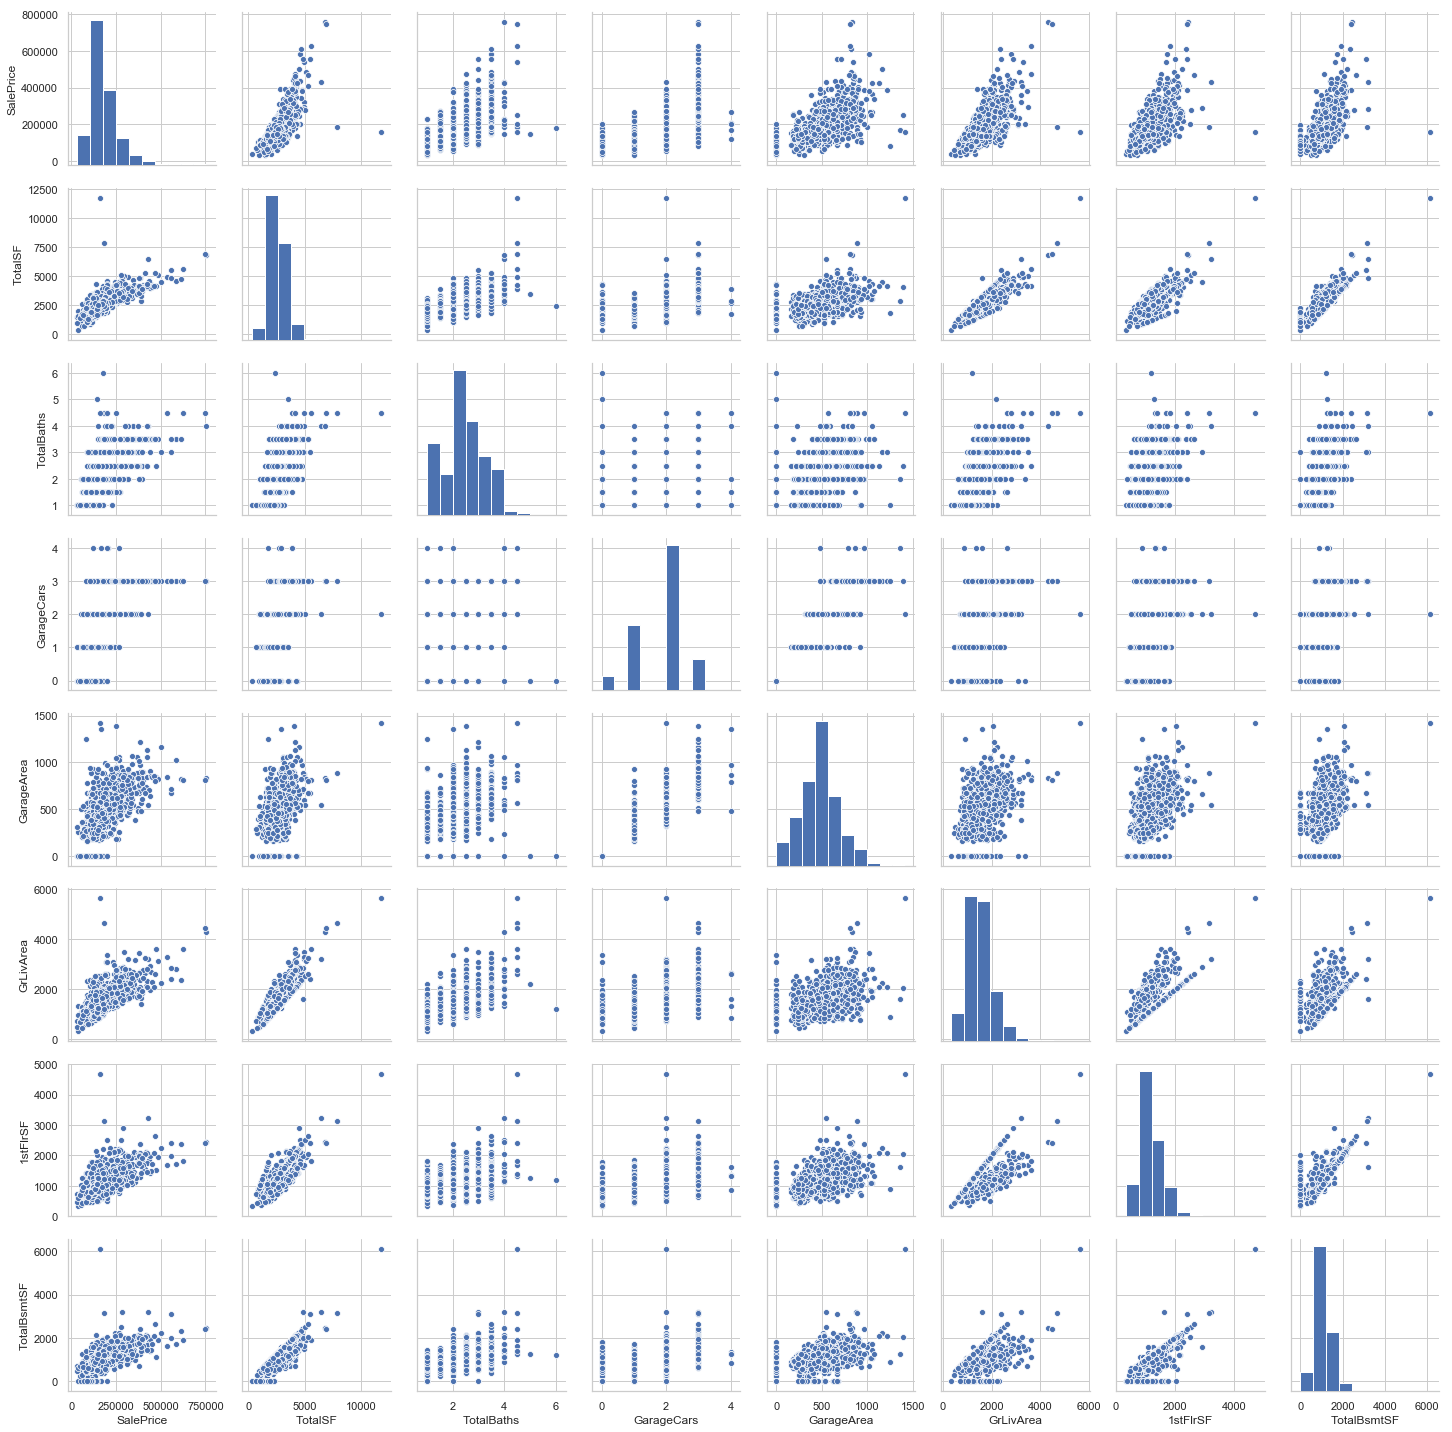

In [664]:
high_corr = ['SalePrice', 'TotalSF', 'TotalBaths', 'GarageCars', 'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']

sns.pairplot(df_housing[high_corr])
plt.show()

We can clearly see these variables share linear relationship with SalePrice.
However, we can also observe the presence of few outliers in these variables.
Let's verify and treat, them as these variables have a high chances of being the predictor variables in the final model.

#### Outliers treatment

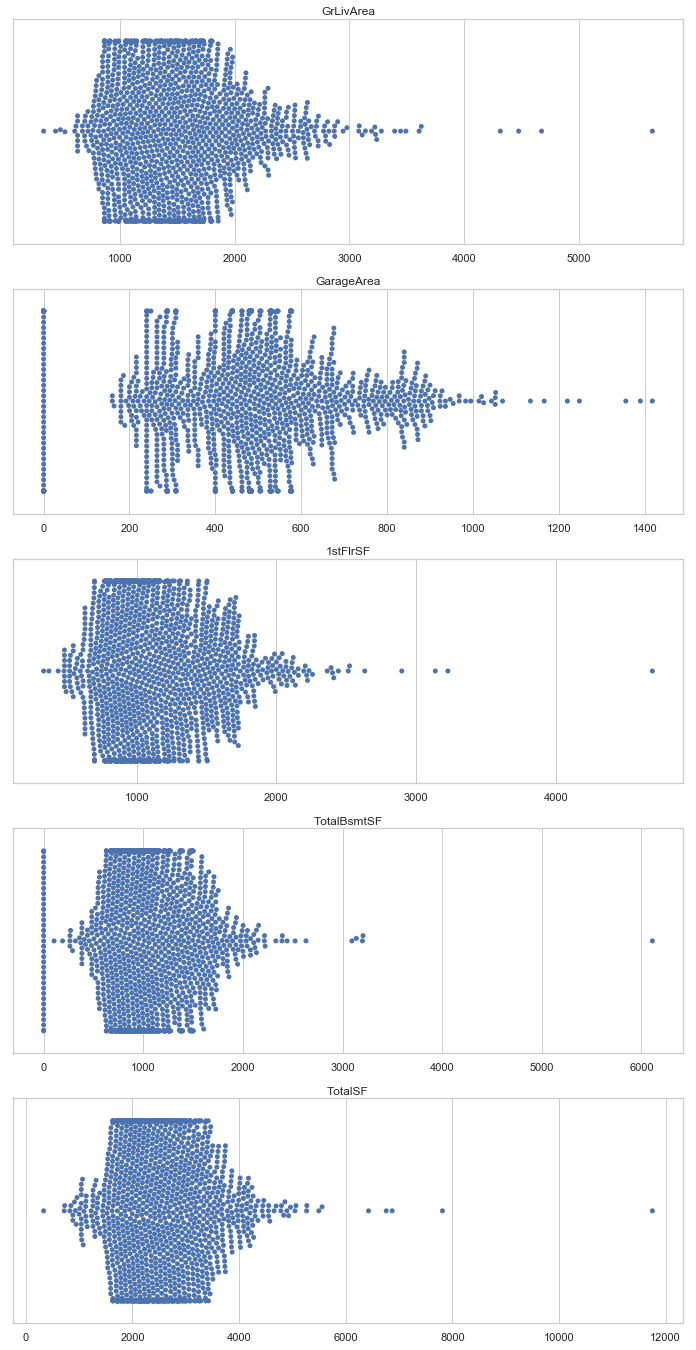

In [665]:
plt.figure(figsize=(12,24))
sns.set(style='whitegrid')

plt.subplot(5,1,1)
ax = sns.swarmplot(x=df_housing['GrLivArea'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,2)
ax = sns.swarmplot(x=df_housing['GarageArea'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,3)
ax = sns.swarmplot(x=df_housing['1stFlrSF'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,4)
ax = sns.swarmplot(x=df_housing['TotalBsmtSF'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,5)
ax = sns.swarmplot(x=df_housing['TotalSF'])
ax.xaxis.set_label_position('top')

In [666]:
# Remove outliers

df_housing = df_housing[df_housing['GrLivArea'] < 4000]
df_housing = df_housing[df_housing['GarageArea'] < 1200]
df_housing = df_housing[df_housing['1stFlrSF'] < 3000]
df_housing = df_housing[df_housing['TotalBsmtSF'] < 3000]
df_housing = df_housing[df_housing['TotalSF'] < 6000]

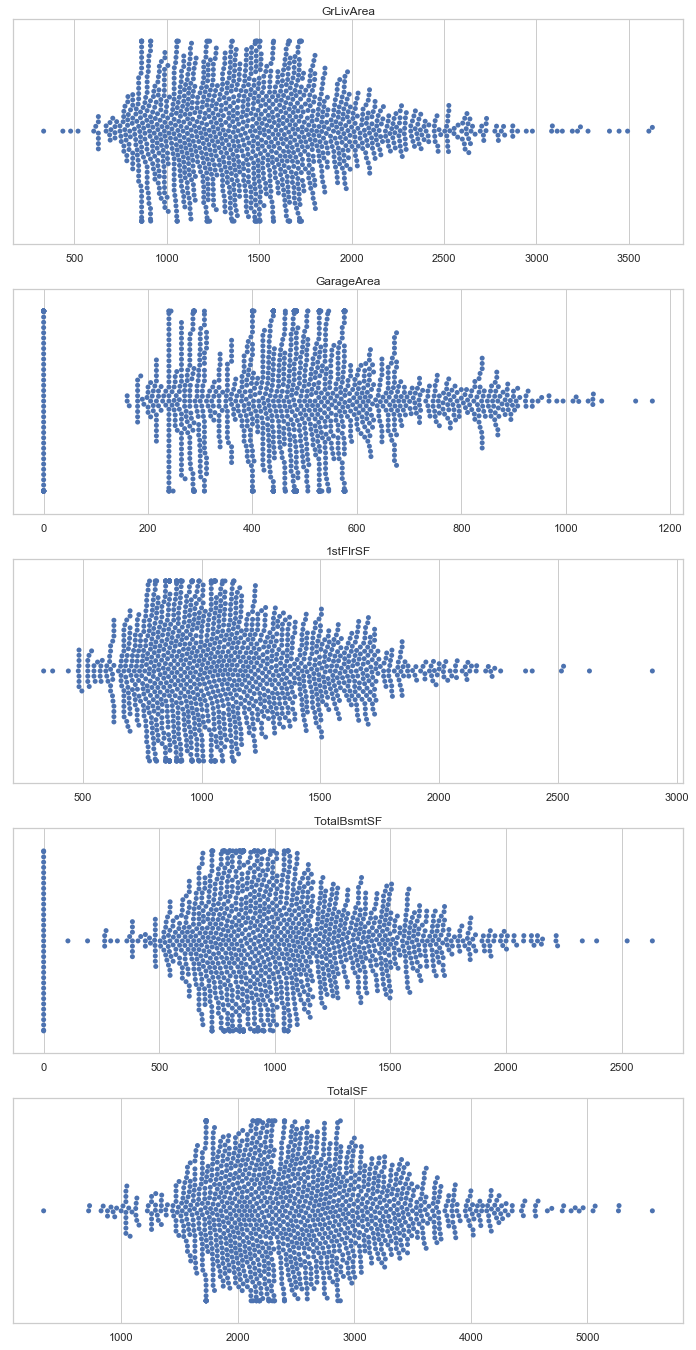

In [667]:
plt.figure(figsize=(12,24))
sns.set(style='whitegrid')

plt.subplot(5,1,1)
ax = sns.swarmplot(x=df_housing['GrLivArea'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,2)
ax = sns.swarmplot(x=df_housing['GarageArea'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,3)
ax = sns.swarmplot(x=df_housing['1stFlrSF'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,4)
ax = sns.swarmplot(x=df_housing['TotalBsmtSF'])
ax.xaxis.set_label_position('top')

plt.subplot(5,1,5)
ax = sns.swarmplot(x=df_housing['TotalSF'])
ax.xaxis.set_label_position('top')

Outliers are removed now.

#### Numerical Variables

In [668]:
df_numerical = df_housing.select_dtypes(include=[np.number])
df_numerical.shape

(1449, 31)

In [669]:
num_vars = list(df_numerical.columns)
num_vars.remove('SalePrice')

In [670]:
X = df_housing[num_vars]
y = df_housing['SalePrice']

#### Create Dummies for Categorical Variables

In [671]:
df_categ = df_housing.select_dtypes(exclude=[np.number])
df_categ.shape

(1449, 50)

In [672]:
# List of categorical variables
categ_vars = list(df_categ.columns)

In [673]:
df_categ = pd.get_dummies(df_categ, drop_first = True)
df_categ.shape

(1449, 438)

In [674]:
df_categ.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [675]:
df_housing = pd.concat([df_housing, df_categ], axis = 1)
df_housing.shape

(1449, 519)

In [676]:
# Drop original variables as we have created the dummies for them
df_housing.drop(categ_vars, axis = 1, inplace = True)
print(df_housing.shape)
df_housing.head()

(1449, 469)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


### Split Data into Train and Test Sets

In [677]:
df_train, df_test = train_test_split(df_housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescale Numerical Variables

In [678]:
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

y_train = df_train.pop('SalePrice')
X_train = df_train

In [679]:
# apply rescaling to the test set also
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('SalePrice')
X_test = df_test

In [680]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1014, 468), (435, 468), (1014,), (435,))

### Model Building and Evaluation

#### Ridge Regression

In [681]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [682]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.297180,0.540280,0.005788,0.010589,0.0001,{'alpha': 0.0001},0.776084,0.854601,0.873652,0.846442,...,0.822939,0.044346,26,0.974381,0.968959,0.974824,0.971417,0.973060,0.972528,0.002143
1,0.030743,0.004416,0.000798,0.001596,0.001,{'alpha': 0.001},0.777572,0.857237,0.874008,0.847165,...,0.824578,0.043775,25,0.974381,0.968957,0.974824,0.971417,0.973058,0.972527,0.002144
2,0.028650,0.006511,0.000399,0.000488,0.01,{'alpha': 0.01},0.788858,0.871957,0.877226,0.852909,...,0.835627,0.039756,23,0.974358,0.968877,0.974804,0.971395,0.972987,0.972484,0.002161
3,0.027911,0.006839,0.003399,0.006312,0.05,{'alpha': 0.05},0.812842,0.887677,0.886847,0.867822,...,0.855646,0.031790,22,0.974110,0.968430,0.974551,0.971146,0.972559,0.972159,0.002219
4,0.034807,0.007127,0.000399,0.000489,0.1,{'alpha': 0.1},0.826137,0.893659,0.893585,0.877602,...,0.866564,0.027708,21,0.973724,0.967943,0.974100,0.970729,0.972043,0.971708,0.002238


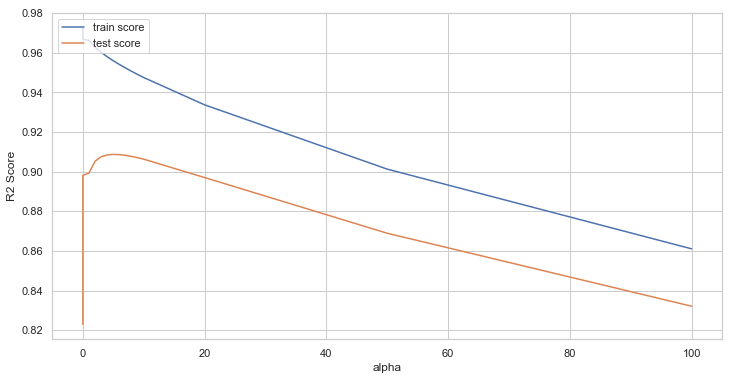

In [683]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [684]:
ridge_cv.best_score_

0.9087454745772646

In [685]:
ridge_cv.best_params_

{'alpha': 5.0}

Optimal value of lambda for ridge is 5.

In [686]:
alpha = 5

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [687]:
# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9536964080483874
0.8835914704189932


#### Lasso Regression

For features selection let's use Lasso Regression

In [688]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   49.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [689]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.482104,0.158097,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.780500,0.859261,0.865500,0.841397,...,0.829760,0.033111,25,0.974379,0.968906,0.974819,0.971402,0.972979,0.972497,0.002157
1,0.529015,0.135684,0.003715,0.005950,0.001,{'alpha': 0.001},0.780562,0.859150,0.865777,0.841398,...,0.829621,0.033290,27,0.974379,0.968906,0.974819,0.971402,0.972978,0.972497,0.002157
2,0.416570,0.045823,0.000000,0.000000,0.01,{'alpha': 0.01},0.781161,0.858870,0.868355,0.841544,...,0.829736,0.034087,26,0.974379,0.968906,0.974819,0.971402,0.972978,0.972497,0.002157
3,0.419019,0.049535,0.000797,0.000746,0.05,{'alpha': 0.05},0.783273,0.861542,0.871887,0.840630,...,0.828758,0.037282,28,0.974379,0.968904,0.974818,0.971401,0.972974,0.972495,0.002157
4,0.435973,0.029938,0.000000,0.000000,0.1,{'alpha': 0.1},0.785764,0.863578,0.873598,0.840873,...,0.830031,0.037485,24,0.974377,0.968900,0.974816,0.971399,0.972969,0.972492,0.002158


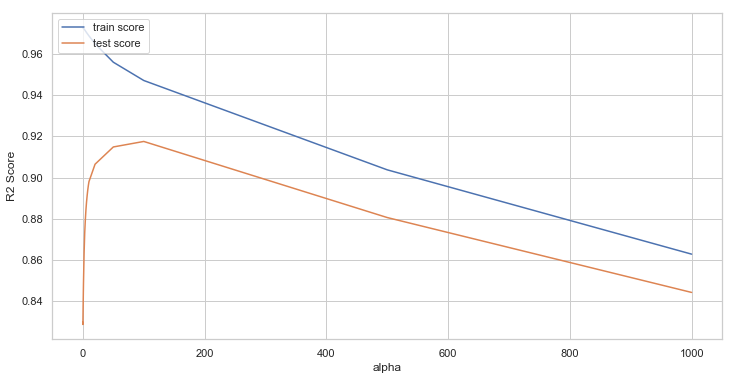

In [690]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [691]:
lasso_cv.best_score_

0.9174822599255343

In [692]:
lasso_cv.best_params_

{'alpha': 100}

Optimal value of lambda for lasso is 100.

In [693]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [694]:
# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9438499881437823
0.8901862148225264


Both Ridge and Lasso Regressions almost have the same R2 score.

In [695]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 124 variables


In [696]:
# Best variables predicting housing prices as per Lasso Regression
main_coef = pd.concat([coef.sort_values().head(10),
                       coef.sort_values().tail(10)])

main_coef.sort_values(ascending=False)

TotalSF                 115500.300119
GrLivArea                69111.530878
OverallQual_10           59160.617992
OverallQual_9            50745.693915
LotArea                  43235.894890
RoofMatl_WdShngl         34219.052548
Neighborhood_StoneBr     32651.251879
SaleType_New             32132.327445
GarageCars               22872.293395
OverallQual_8            22043.140519
OverallQual_5            -9179.531040
BsmtQual_Fa             -10361.892546
OverallCond_4           -10932.823422
BsmtQual_Gd             -12956.792197
KitchenQual_Gd          -13364.205124
KitchenQual_TA          -14536.523757
BsmtQual_TA             -14553.768841
KitchenQual_Fa          -15085.364301
OverallCond_3           -20985.279327
KitchenAbvGr            -25513.254330
dtype: float64

Text(0.5,1,'Coefficients in the Lasso Model')

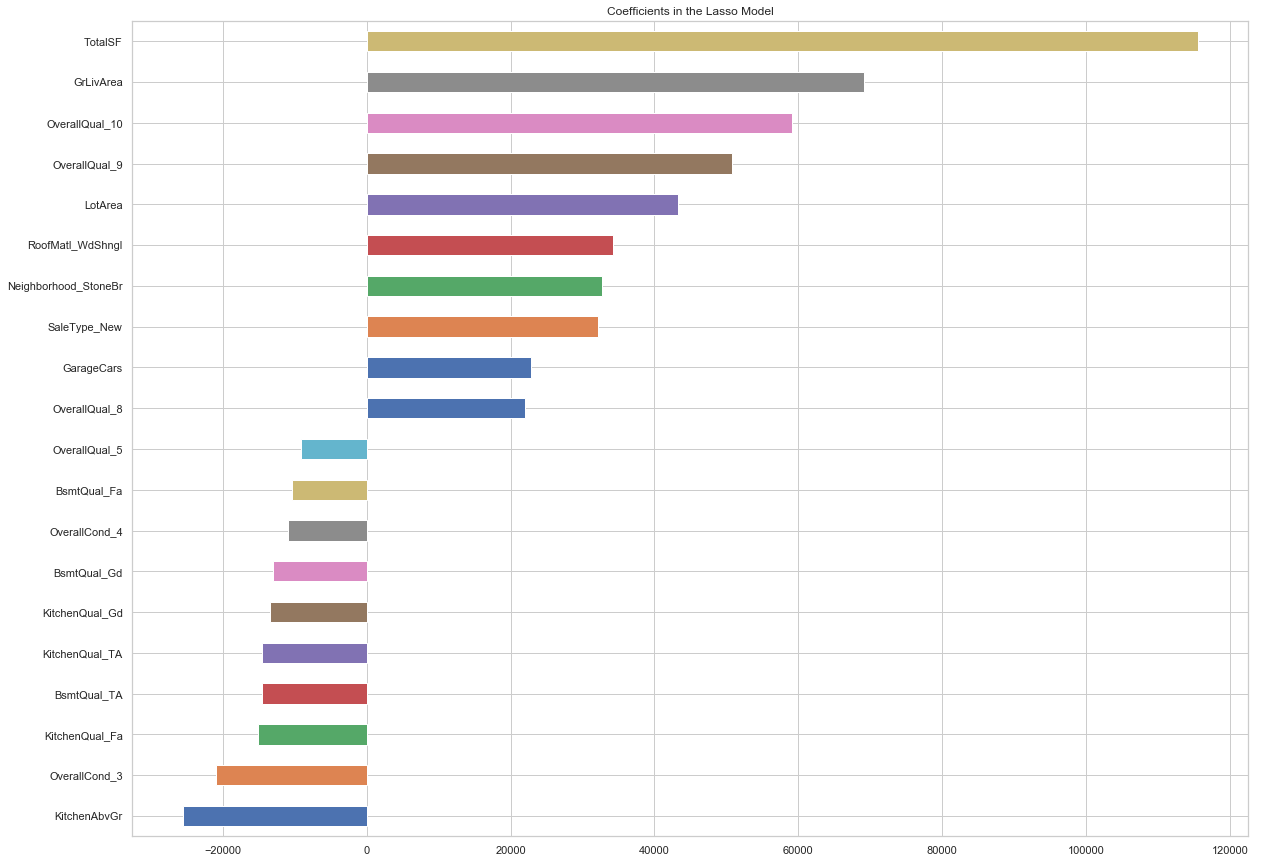

In [697]:
# Let's plot these variables
plt.figure(figsize = (20,15))

main_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### <font color='orange'>Conclusion:</font>

Following are the most significant variables in predicting the price of a house:

- <font color='green'>Total Square Feet (TotalSF)</font>

    - <font color='blue'>TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF</font>
- <font color='green'>GrLivArea</font>
- <font color='green'>Overall material and finish of the house (OverallQual):</font>

    - <font color='blue'>10 Very Excellent
    - 9	Excellent
    - 8	Very Good</font>
- <font color='green'>LotArea</font>
- <font color='green'>Roof material (RoofMatl)</font>

    - <font color='blue'>Wood Shingles</font>
- <font color='green'>Neighborhood</font>

    - <font color='blue'>Stone Brook</font>
- <font color='green'>Type of sale (SaleType)</font>

    - <font color='blue'>Home just constructed and sold</font>
- <font color='green'>GarageCars</font>